# Generation of Captions from Images

Tianyuan Cai

**Documentation Requirements:**

**Project summary (Abstract)**

One page Word document in a separate file. Project summary should contain your name /team,  title of your project and URLs to YouTube video.
Produce a one page summary to describe the problem you are trying to solve, your data set, the particular technology topic or feature you are demonstrating, its uses, benefits, drawbacks, challenges and your results.  Describe briefly the working example you prepared. This first page is very important. Based on that page, your colleagues will judge whether to download your project and spend time reading your documentation and code. Please add YouTube / reference URLs  to the bottom of the one page summary. 

Filenames should be prefixed with team if appropriate and then topic (abbreviate project), followed by your name:
	- you must identify and list all team members in all of your FP files
	- you must prefix your final zip with label "Team" e.g. Team_ShortTopicName_YourLastNameYourFirstName_Final.zip

**Demo/solution implementation and working code (python notebook)**

Produce a single working demo that meets your problem statement and provides a full implementation of your solution.  You may not simply copy examples (demonstrations) of the technology that are online. (Grade will be 0).  You can use code skeletons that are provided as we have done in class and show your extended programming use of them.  Provide neatly organized and complete working code with comments. Please note that a project will not be given any points if a working implementation and code are missing. Please provide the URL to your full data source. If your data set is larger than 10MB, PLEASE DO NOT UPLOAD your data set. In such a case, please provide only a sample of your data with the rest of your submission. Our site has a limited capacity and a few large submissions could block it.
PLEASE, PLEASE do not upload final projects which take more than 20 MB of space. In the past we had students who would upload GBs of data and block Canvas site. We do not find such practical jokes amusing.

**Slides**

Produce a set of Power Point slides (10-20) with a few snapshots of your demo which captures the key points: your problem statement, what the technology does, your demonstration and pros/cons. The first page of your Power Point slide must have a standard format that we provide.  Please use white background for all your Power Point slides. White background makes slides readable, printable and presentable on YouTube. Place URLs of your YouTube videos on the last slide.  Note: The filename should start with the topic name followed by your name

**Report**

Produce a detailed document with a complete description of analyzed technology or use case including all installation and configuration steps. Your report will start with your name and project title. Detailed installations and configuration is required. Your colleagues must be able to reproduce your work based solely on the steps you have documented.  Describe your problem statement, data set, installation/configuration, results, what worked, what did not and why not, and any lessons learned. Report must show all steps to reproduce examples that you developed.  This report is similar to your homework solutions where all steps are described along with the results.
* The first page of your report should be the same as the one page summary (abstract). The first page should contain your name /  team (as appropriate list all team members) and the project topic name. 
* Please include your name and your project topic in the header or the footer of your MS Word Document. 
* Name your file like you named 1 page summary appended with `_report`.
* Please include page numbers. 
* You are welcome to upload a PDF version of all documents. However, you must always submit an MS Word version of your report. Just submitting a Jupyter notebook is not acceptable. You must create a written report in MS Word.
* Please include URLs for your YouTube videos at the end of your report

**2-minute YouTube presentation**

Produce a 2 minute YouTube presentation. This video will contain a summary of the technology and a quick overview of your demonstration. This video might get presented to the entire class so please make sure it is 2 minutes and not more. 

**Submission Instructions: **

`Image_Captioning_CaiTianyuan_Final.zip`
* Submit final project on the course site. 
* Files to be submitted
	- Report, by itself
	- Slides, by itself
	- Code and surrounding artifacts, in a ZIP file
		- viz in a separate folder
	- Data files, in a separate ZIP file

Grading criteria:
If you fail to provide working code submitted in working directories with all artifacts it produces and (toy-sample) dataset, your project will not be graded. 

All other artifacts: Report, One page summary, PPTs are uploaded separately.

Assuming code is submitted:
* 50%, Project Report and practical software code example
* 25%, PowerPoint Slides
* 15%, 2 minute YouTube video
* 10%, One page summary

## Project Summary
### Overview
In this project, I ...

Image captioning has a large variety of applications. By understanding common objects in an image, and transforming them into text information, we can compress large photographic infomation into more compact data formats. This ability can be applied in a wide range of fields such as voice over technologies, product recommendation, etc. 

### Data

Common Objects in Context (commonly referred to as [COCO](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)) data set provided by Microsoft is used.

COCO dataset provides a set of images that identifies common objects in context. The data include both images and captions that describes the objects and their context.

If I had more time, include flickr data.

### Methodology

#### Model

Usage, pros and cons

#### Techniques

Usage, pros and cons

* Hyper-parameter tuning
* InceptionV3 trained on ImageNet, tradeoffs and alternatives
* Glove

### The rest of the document

* Working code
* Examples

## Problem Statement

## Preparing Environment

_[Detailed installations and configuration is required.]_

I start by installing packages that do not commonly come with Anaconda. This particular program uses tensorflow-gpu on a Titan Xp GPU. The `tqdm` package might be needed when loading encoded images on a computer with limited memory. 

Download necessary packages and dependencies.

In [98]:
!pip install pillow numpy scikit-image keras Cython pycocotools nltk seaborn pydot graphviz

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/tcai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tcai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tcai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
import os
import pickle
from time import time
import json
import re

from pycocotools.coco import COCO
import sklearn
import keras
import keras.applications.imagenet_utils
from PIL import Image
import tensorflow as tf

import skimage.io as io
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import pylab
pylab.rcParams['figure.figsize'] = (4, 6)
from keras.applications.inception_v3 import preprocess_input

import nltk
from nltk.stem import WordNetLemmatizer

In [100]:
# Test if running on GPU
keras.backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Data

### Data Overview

The data source used for this analysis is called COCO, common objects in context. See [Coco API](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb) for package usage. 

COCO dataset provides a set of images that identifies common objects in context. The data include both images and captions that describes the objects and their context.

We start by extracting image and caption (annotation) data from COCO website. 

In [101]:
data_dir = "/home/tcai/Documents/nlp/final_project"
data_type = "train2017"
data_zipfile = '%s.zip'%(data_type)

Run the following command only once to obtain and extract files. If the files already exist, remove them to ensure the `get_file` commands can run smoothly.

In [102]:
# annotation_zip = tf.keras.utils.get_file('captions.zip',
#                                          cache_subdir=os.path.abspath('.'),
#                                          origin = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip',
#                                          extract = True)
# image_zip = tf.keras.utils.get_file(data_zipfile,
#                                     cache_subdir=os.path.abspath('.'),
#                                     origin = 'http://images.cocodataset.org/zips/%s'%(data_zipfile),
#                                     extract = True)
# glove6b_zip = tf.keras.utils.get_file('glove.6B.zip',
#                                     cache_subdir=os.path.abspath('./glove6b'),
#                                     origin = 'http://nlp.stanford.edu/data/glove.6B.zip',
#                                     extract = True)

In [103]:
# Annotation file
annotation_file = data_dir + '/annotations/captions_%s.json'%(data_type)
image_dir = data_dir+'/%s/'%(data_type)

Coco provides images that are categorized into a variety of categories. The categories listed below can be used to index images in the data set.

In [104]:
# Initialize COCO api for instance annotations
coco_caps=COCO(annotation_file)

# Obtain categories
annFile='{}/annotations/instances_{}.json'.format(data_dir, data_type)
coco=COCO(annFile)

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('\nCOCO Categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO Supercategories: \n{}'.format(' '.join(nms)))

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!
loading annotations into memory...
Done (t=10.36s)
creating index...
index created!

COCO Categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO Supercategories: 
food furniture person outdoor appliance kitchen electronic animal indoor vehicle sports accessory


The index of the chosen image is 106484.

The corresponding captions are:
A man walking a dalmatian on a red leash.
The man has a red leash on his Dalmatian dog.
a man walks a dog with a leech 
A guy is walking his dalmatian down the road. 
A man walking a dalmatian on leash in front of a firetruck.


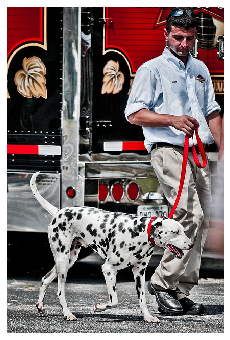

In [105]:
# Show sample data set by choosing categories
temp_cat = ['dog','person', 'ball']

catIds = coco.getCatIds(catNms=temp_cat)
imgIds = coco.getImgIds(catIds=catIds)

if len(imgIds) > 0:
    imgIds = coco.getImgIds(imgIds = imgIds[-1]) # Pick the last image
    print("The index of the chosen image is %s.\n"%(str(imgIds[0])))
else:
    print("No matched images found.")

# load and display captions
annIds = coco_caps.getAnnIds(imgIds)
anns = coco_caps.loadAnns(annIds)
print("The corresponding captions are:")
coco_caps.showAnns(anns)

# Show image
img = coco.loadImgs(imgIds)[0]
I = io.imread('%s/%s/%s'%(data_dir,data_type,img['file_name']))
plt.imshow(I); plt.axis('off'); plt.show()

### Train-test Split

Captions, images paths, and encoded image features are needed in order to effectively implemented the training. Rather than using `train_test_split` function, I choose to shuffle the data and subset to the desired number of train and test samples.

In [106]:
# TODO: Change this to a smaller value during submission
total_examples = 100000
train_examples = int(0.8 * total_examples)

# Subset training and testing images
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

all_img_path_vector = {}
all_img_name_vector = list(set([x['image_id'] for x in annotations['annotations']]))
print("Choosing %s training images and %s validation images from a total of %s images"%(train_examples, total_examples - train_examples, len(all_img_name_vector)))

for img_id in all_img_name_vector:
    img = coco.loadImgs(img_id)[0]
    image_file_path = '%s/%s/%s'%(data_dir,data_type,img['file_name'])
    all_img_path_vector[img_id] = image_file_path
    
all_img_name_vector = sklearn.utils.shuffle(all_img_name_vector, random_state = 0)
all_img_name_vector = all_img_name_vector[:total_examples] # subset

train_img_name_vector = all_img_name_vector[:train_examples] # train
test_img_name_vector = all_img_name_vector[train_examples:] # test

Choosing 80000 training images and 20000 validation images from a total of 118287 images


## Extract Image Features

I use a pre-trained model, Inception V3 model, to encode images such that we can extract the spacial content of the images. I took out the final fully-connected layer in order to pass the features along to the image captioning model. When encoding, note that hash table is used to ensure I am encoding distinct images. This is because one image has multiple captions associated with it. 

### Image Encoder

In [107]:
# https://keras.io/applications/#inceptionv3
# feature_model = keras.applications.inception_v3.InceptionV3(weights='imagenet')
image_model = keras.applications.InceptionV3(weights='imagenet')
feature_model = keras.models.Model(image_model.input, image_model.layers[-2].output)

Define encoding function that:
* Transform the image into consistent sizes
* Convert the images to array
* Expand dimensions
* Preprocess the input
* Reshape images

In [108]:
# Encoding function for feature extraction
def encode(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = keras.applications.inception_v3.preprocess_input(img_array)
    fea_vec = feature_model.predict(img_array)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return(fea_vec)

In [109]:
# Testing image model
def inceptionv3_predict(image_path, image_model):
#     image_path = '/home/tcai/Documents/nlp/final_project/train2017/000000262145.jpg'
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = keras.applications.inception_v3.preprocess_input(img_array)
    preds = image_model.predict(img_array)
    P = keras.applications.imagenet_utils.decode_predictions(preds)
    
    # Show prediction result
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
    
    # Show image
    I = io.imread(image_path)
    plt.imshow(I); plt.axis('off'); plt.show()

The Inception V3 model is able to recoginize objects in a given image. 

1. freight_car: 40.83%
2. passenger_car: 29.35%
3. electric_locomotive: 5.97%
4. steam_locomotive: 1.17%
5. mobile_home: 0.59%


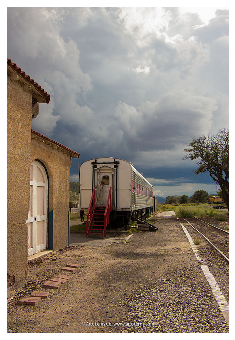

In [110]:
random_img_id = np.random.choice(all_img_name_vector)
random_img_path = all_img_path_vector[random_img_id]
inceptionv3_predict(random_img_path, image_model)

### Encode Images

Encode images and then store the encoded image features in a pickle file to be loaded for future uses.

In [111]:
# # Encode all the train images
# start = time()
# train_features = {}
# for img_id in all_img_name_vector:
#     train_features[img_id] = encode(all_img_path_vector[img_id])

# print("Time taken in seconds =", time() - start)

# # Pickle the features
# with open(data_dir + "/encoded_train_images.pkl", "wb") as encoded_pickle:
#     pickle.dump(train_features, encoded_pickle)

In [112]:
train_features = pickle.load(open(data_dir + "/encoded_train_images.pkl", "rb"))
print('%d photos in total are encoded. These include both training and testing image set.' % len(train_features))

100000 photos in total are encoded. These include both training and testing image set.


For each captions in the training and testing data set, I append images back onto the captions so that all captions and features are included.

In [113]:
# Train images
captions = []
images = []
images_features = []

for img_id in train_img_name_vector:
    img_path = all_img_path_vector[img_id]
    img_feature = train_features[img_id]
    img_captions = coco_caps.loadAnns(coco_caps.getAnnIds(img_id))
    
    for caption in [x['caption'] for x in img_captions]:
        captions.append('start_sentence ' + caption + ' end_sentence')
        images.append(img_path)
        images_features.append(img_feature)

captions, images, images_features = sklearn.utils.shuffle(captions, images, images_features, random_state = 0)

In [114]:
# Test images
test_captions = []
test_images = []
test_images_features = []

for img_id in test_img_name_vector:
    img_path = all_img_path_vector[img_id]
    img_feature = train_features[img_id]
    img_captions = coco_caps.loadAnns(coco_caps.getAnnIds(img_id))
    
    for caption in [x['caption'] for x in img_captions]:
        test_captions.append('start_sentence ' + caption + ' end_sentence')
        test_images.append(img_path)
        test_images_features.append(img_feature)

test_captions, test_images, test_images_features = sklearn.utils.shuffle(test_captions, 
                                                                         test_images, 
                                                                         test_images_features, 
                                                                         random_state = 0)

In [115]:
print('Training: %s distinct images, %s captions,'%(len(list(set(images))), 
                                                    len(captions)))
print('Validation: %s distinct images, %s captions,'%(len(list(set(test_images))),
                                                      len(test_captions)))

Training: 80000 distinct images, 400204 captions,
Validation: 20000 distinct images, 100057 captions,


## Word Embeddings

### Distribution of Words

In [116]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [117]:
number_of_words = 6000
# Choose the top words from the vocabulary
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= number_of_words, oov_token="<unk>", 
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^`{|}~ ')
captions = [caption.lower() for caption in captions]
tokenizer.fit_on_texts(captions)

In [118]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

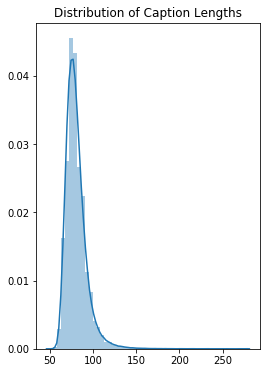

In [119]:
sentence_lengths = [len(caption) for caption in captions]
plt.title('Distribution of Caption Lengths')
sns.distplot(sentence_lengths)

### Vector Representations with GloVe

Global Vectors for Word Representatiion (GloVe) is used to obtain embedding vectors for each word that appear in the captions.

In [120]:
# Calculates sentence and vocab lengths
# max_length = calc_max_length(train_seqs)
max_length = 100   # This can be changed later
vocab_size = len(tokenizer.index_word)
print("Original max sentence length is %s; I set it to %s."%(calc_max_length(captions), max_length))
print("The vocabulary size is: %s"%(vocab_size))

Original max sentence length is 278; I set it to 100.
The vocabulary size is: 23636


In [121]:
embedding_dim = 300
embeddings_index = {}

with open(data_dir + '/glove6b/glove.6B.%sd.txt'%(embedding_dim), encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [122]:
# Get dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in (tokenizer.word_index).items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

In [123]:
embedding_matrix.shape

(23636, 300)

## Model

In [124]:
# Extract features
inputs1 = tf.keras.Input(shape=(2048,))
fe1 = tf.keras.layers.Dropout(0.5)(inputs1)
fe2 = tf.keras.layers.Dense(256, activation='relu')(fe1)
# Sequence model
inputs2 = tf.keras.Input(shape=(max_length,))
se1 = tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = tf.keras.layers.Dropout(0.5)(se1)
se3 = tf.keras.layers.LSTM(256)(se2)
# Decoder model
decoder1 = tf.keras.layers.Add()([fe2, se3])
decoder2 = tf.keras.layers.Dense(256, activation='relu')(decoder1)
outputs = tf.keras.layers.Dense(vocab_size, activation='softmax')(decoder2)
# Final model
model = tf.keras.models.Model(inputs=[inputs1, inputs2], outputs=outputs)

In [125]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [126]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [127]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [128]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 300)     7090800     input_6[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 2048)         0           input_5[0][0]                    
____________________________________________________________________________________________

### Training

In [129]:
def generate_sequences(tokenizer, max_length, caption, image_feature):
    Ximages, XSeq, y = list(), list(),list()
    vocab_size = len(tokenizer.word_index)
    seq = tokenizer.texts_to_sequences([caption])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
        # select
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = tf.keras.preprocessing.sequence.pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
        # encode output sequence
        out_seq = tf.keras.utils.to_categorical([out_seq], num_classes=vocab_size)[0]

        image_feature = np.squeeze(image_feature)
        Ximages.append(image_feature)
        XSeq.append(in_seq)
        y.append(out_seq)
    Ximages, XSeq, y = np.array(Ximages), np.array(XSeq), np.array(y)
    return [Ximages, XSeq, y]

In [130]:
def data_generator(tokenizer, max_length, captions, images_features, batch_size):
    # loop for ever over images
    n = 0
    while True:
        for i in range(len(captions)):
            in_img_vector = []
            in_seq_vector = []
            out_word_vector = []
            # load an image from file
            image_feature = images_features[i]
            # create word sequences
            caption = captions[i]
            in_img, in_seq, out_word = generate_sequences(tokenizer, max_length, caption, image_feature)
            in_img_vector.append(in_img)
            in_seq_vector.append(in_seq)
            out_word_vector.append(out_word)
            n += 1
            if n == batch_size:
                n = 0
                yield [in_img, in_seq], out_word

In [131]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'start_sentence'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_length, padding='post')
        
        photo = photo.reshape(2048,1).T
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = tokenizer.index_word[yhat]
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end_sentence':
            break

    in_text = re.sub(r'(start|end)_sentence', '', in_text).strip()
    return in_text

In [132]:
# Store defautl weights
epoch_idx = 0
model_directory = './model'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model.save_weights(model_directory + '/model.h5')

In [192]:
# After trying out different batch sizes, chose the one that proviided the most reasonable results
training_record = {}
epochs = 50
batch_size = 500

In [196]:
# Reset model with default weights before training
model.load_weights(model_directory + '/model.h5')

In [197]:
steps = len(captions)//batch_size
training_record[batch_size] = []
epoch_idx = 0

In [200]:
from keras.callbacks import History 
history = History()

In [ ]:
while epoch_idx < epochs:
    generator = data_generator(tokenizer, max_length, captions, images_features, batch_size)
    history = model.fit_generator(generator, steps_per_epoch=steps, verbose=1)
    model.save_weights(model_directory + '/model_epoch%s_bs%s.h5'%(epoch_idx, batch_size))

    epoch_idx += 1

    distinct_desc = []
    temp_desc = ''
    for j in range(20):
        img_desc = generate_desc(model, tokenizer, images_features[j], max_length)
        distinct_desc.append(img_desc)
        temp_desc += '' + img_desc

    training_record[batch_size].append(distinct_desc)
    print("Model %s generated %s distinct captions with %s distinct words."%(epoch_idx, 
                                                                             len(list(set(distinct_desc))),
                                                                             len(list(set(temp_desc.split(' '))))))

800/800 [==============================] - 246s 307ms/step - loss: 1.0110
Model 25 generated 16 distinct captions with 75 distinct words.
800/800 [==============================] - 246s 308ms/step - loss: 0.9122
Model 26 generated 15 distinct captions with 72 distinct words.
100/800 [==>...........................] - ETA: 3:35 - loss: 0.7163

At the first few epochs of the model training process, the model exhibits underfitting behavior where no distinct captions are generated. By understanding the number of distinct captions generated for a list of 20 images, I seek to approximate the appeal the model has for a human reader. In addition, as a model continues to learn from the training data, it becomes capable of generating more vocabularies as well.

Training Performance with a batch size of 500 and 20 epochs.

Predicted Caption: a young man is on his skateboard on his skateboard 
Actual Caption:  a boy is standing in a field with a bat 


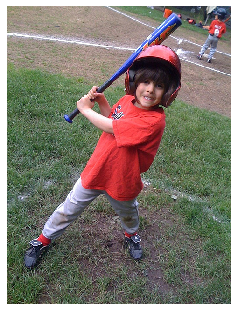

Predicted Caption: a man pushing a lot of luggage in an airport 
Actual Caption:  a white bed in a bedroom and two boxes on the floor 


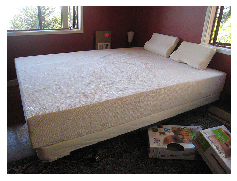

Predicted Caption: a man pushing a lot of luggage in an airport 
Actual Caption:  A basin for a sanitary drainage system.  


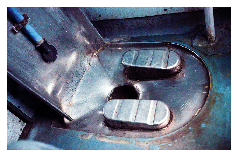

Predicted Caption: a man about a tennis ball with a lot of spectators 
Actual Caption:  Two images of women playing tennis on a tennis court 


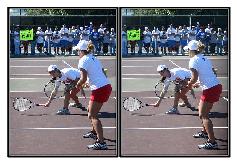

Predicted Caption: a dog is sitting on a tricycle next to a flower bed 
Actual Caption:  Pizza with five large red peppers evenly spaced 


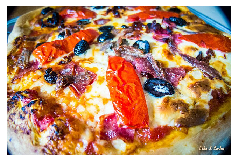

In [186]:
# Train images
print("Training Performance with a batch size of %s and %s epochs.\n"%(batch_size, epochs))

model.load_weights(model_directory + '/model_epoch%s_bs%s.h5'%(epochs - 1, batch_size))
for j in np.random.choice(range(len(test_captions)), 5):
    # Compare captions
    img_desc = generate_desc(model, tokenizer, test_images_features[j], max_length)
    actual_caption = test_captions[j]
    actual_caption = re.sub(r'(start|end)_sentence', '', actual_caption)

    print("Predicted Caption: %s \nActual Caption: %s"%(img_desc, actual_caption))
    # Show image
    I = io.imread(test_images[j])
    plt.imshow(I); plt.axis('off'); plt.show()

### Tuning

A wide range of parameters in the model can be tuned. I tuned the batch size and <mark>drop out rate</mark>. If I have more time, I will also tune the maximum sentence length, word frequency cut-off values (currently none), etc.

In [94]:
training_record = {}
epochs = 20

In [97]:
# Trying out different batch sizes
for batch_size in [500, 1000, 1500, 3000]:
    model.load_weights(model_directory + '/model.h5')
    steps = len(captions)//batch_size
    print(batch_size)
    training_record[batch_size] = []
    epoch_idx = 0
    while epoch_idx < epochs:
        generator = data_generator(tokenizer, max_length, captions, images_features, batch_size)
        model.fit_generator(generator, steps_per_epoch=steps, verbose=1)
        model.save_weights(model_directory + '/model_epoch' + str(epoch_idx) + "_bs" + str(batch_size) +'.h5')
        epoch_idx += 1

        distinct_desc = []
        temp_desc = ''
        for j in range(20):
            img_desc = generate_desc(model, tokenizer, images_features[j], max_length)
            distinct_desc.append(img_desc)
            temp_desc += '' + img_desc
        
        training_record[batch_size].append(distinct_desc)
        print("%s distinct captions, %s distinct words."%(len(list(set(distinct_desc))),
                                                          len(list(set(temp_desc.split(' '))))))

500
800/800 [==============================] - 243s 304ms/step - loss: 5.2389
5 distinct captions, 7 distinct words.
800/800 [==============================] - 241s 302ms/step - loss: 4.2253
5 distinct captions, 9 distinct words.
800/800 [==============================] - 241s 301ms/step - loss: 3.8830
12 distinct captions, 21 distinct words.
800/800 [==============================] - 242s 302ms/step - loss: 3.5934
7 distinct captions, 18 distinct words.
800/800 [==============================] - 243s 304ms/step - loss: 3.3249
14 distinct captions, 30 distinct words.
800/800 [==============================] - 243s 303ms/step - loss: 3.0856
17 distinct captions, 35 distinct words.
800/800 [==============================] - 243s 304ms/step - loss: 2.8480
17 distinct captions, 46 distinct words.
800/800 [==============================] - 241s 301ms/step - loss: 2.6425
19 distinct captions, 51 distinct words.
800/800 [==============================] - 242s 303ms/step - loss: 2.4307
18 dist

KeyboardInterrupt: 

Now, we turn to test the performance of the models trained using different batch sizes using the same train and validation images.

#### Test on Training Data

In [163]:
np.random.seed(0)

In [175]:
rand_train_image = np.random.choice(range(len(captions)))

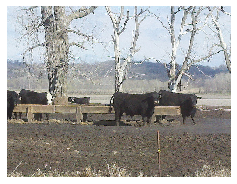

The actual caption is:
several cows gathered around a trough in a muddy field. 

The predicted captions are:
Batch size = 500: a golden horse eats grass in the pasture
Batch size = 1000: a man flies a kite on the beach
Batch size = 2000: a jockey with a small carved carved with a fence


In [176]:
I = io.imread(images[rand_train_image])
plt.imshow(I); plt.axis('off'); plt.show()

actual_caption = captions[rand_train_image]
actual_caption = re.sub(r'(start|end)_sentence', '', actual_caption).strip()
print("The actual caption is:\n%s \n\nThe predicted captions are:"%(actual_caption))
    
for bs in [500, 1000, 2000]:
    model.load_weights(model_directory + '/model_epoch%s_bs%s.h5'%(epochs - 1, bs))
    # Compare captions
    img_desc = generate_desc(model, tokenizer, images_features[rand_train_image], max_length)

    actual_caption = re.sub(r'(start|end)_sentence', '', actual_caption)
    print("Batch size = %s: %s"%(bs, img_desc))

#### Test on Validation Data

In [161]:
rand_test_image = np.random.choice(range(len(test_captions)))

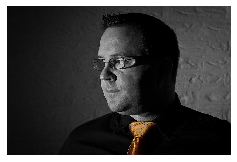

The actual caption is:
a man is standing and looking attentively to the side. 

The predicted captions are:
Batch size = 500: a man pushing a lot of luggage in an airport
Batch size = 1000: a counter of deep dish pizza with a wine glass
Batch size = 2000: a counter with a sandwich with cherries and a lot


In [162]:
I = io.imread(images[rand_test_image])
plt.imshow(I); plt.axis('off'); plt.show()

actual_caption = captions[rand_test_image]
actual_caption = re.sub(r'(start|end)_sentence', '', actual_caption).strip()
print("The actual caption is:\n%s \n\nThe predicted captions are:"%(actual_caption))
    
for bs in [500, 1000, 2000]:
    model.load_weights(model_directory + '/model_epoch%s_bs%s.h5'%(epochs - 1, bs))
    # Compare captions
    img_desc = generate_desc(model, tokenizer, images_features[rand_test_image], max_length)

    actual_caption = re.sub(r'(start|end)_sentence', '', actual_caption)
    print("Batch size = %s: %s"%(bs, img_desc))

## Discussion

### Results

### Results & Learning

Image captionining requires implementation of deep learning methods in both computer vision and natural language processing. While doing this project, I learned to use image and word embeddings to map them into vector representations to be supplied for training. Drop-out layers are included to prevent the model from overfitting, and model tuning is performed to ensure the model achieve reasonable performance. 

<mark>Show performance metrics</mark>
Tuning helped identified that the model tends to perform better with larger batch sizes among the list of the values tested. Increasing the number of epochs is shown to help the model generate more complex vocabularies, but doing that also cause the model to overfit easily. The final model is able to produce sensible captions for the images supplied. However, there remains potential for improvements. 


### Areas of Improvement

The most significant area of improvement is to identify a way to better measure the model performance metric. The current metrics provide categorical accuracy of the model, but it fails to measure whether the final caption is sensible to human readers. 

As we have previously mentioned, because of the distribution of the objects in the training data, the model is more capable of recognizing the objects that appear more often in the data set. 

There also appear to be bias in captioning due to the nature of the caption data provided. When describing people in images, the model is more likely to predict a person as a "man" even when the subject is in fact a woman. This is likely caused by the nature of the original training captions. One future improvement is to upsample the female images and captions in the data set to improve the model's ability to recognize female. 

A data generator for image transformation is able to provide the limited data set with more training information and potentially improve the model performance, especially given the case that the model is underfitting.

The model is able to provide reasonable captions given the images supplied. However, there remain potential for improvements. In the cases where the model is not able to provide sensible captions, the model seems to have trouble distinguishing between objects that have subtle differences, such as sky and ocean, snowboards and surf board, etc. For instance, the model mistakes a man performing a snowboard jump as someone surfing in the ocean, presumably because the blue sky in the background bears resemblance to the color ocean, and the skis appearing in the image looks similar to a surf board.

#### Word Distributions

The model has a slightly biased distribution of words. 

In [ ]:
# Understand vocab distribution
word_list = []
for caption in captions:
    seq = caption.split(" ")
    word_list += seq

lemmatizer = WordNetLemmatizer()
word_list = [lemmatizer.lemmatize(word.lower()) for word in word_list 
                if word and 
                    word.lower() not in nltk.corpus.stopwords.words('english') and
                    "_" not in word]

# Calculate frequency distribution
word_list_dist = nltk.FreqDist(word_list)

# Output top 25 words
limit = 50
word_dict = dict()
for word, frequency in word_list_dist.most_common(limit):
    print(u'{};{}'.format(word, frequency))
    word_dict[word] = frequency

In [ ]:
# TODO: is it possible to optimize the model's BLEU score?